<a href="https://colab.research.google.com/github/anamasaenzb/Business-Analytics/blob/main/Reto3Clustering_AnaMariaSaenzBotero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**RETO 3: MÉTODOS DE CLUSTERING**

Por: Ana María Sáenz Botero.

Objetivo: Implementar un modelo KNN (Key Nearest Neighbor) y un modelo K-Means para determinar la si una persona tiene una enfermedad cardiaca o no.

**1. MODELO KNN:**

0. Cargar las librerias necesarias.

In [ ]:
import numpy as np                   #Funciones matemáticas
import pandas as pd                  #Conexión con Excel
import matplotlib.pyplot as plt      #Para hacer gráficas
import seaborn as sns                #Para graficar distribuciones estadísticas


from sklearn.neighbors import KNeighborsClassifier     #Modelo KNN
from sklearn.metrics import confusion_matrix           #Matriz de confusión
from sklearn.cluster import KMeans                     #Para armar montoncitos de datos

1. Se cargan los datos.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<Figure size 1000x1000 with 0 Axes>

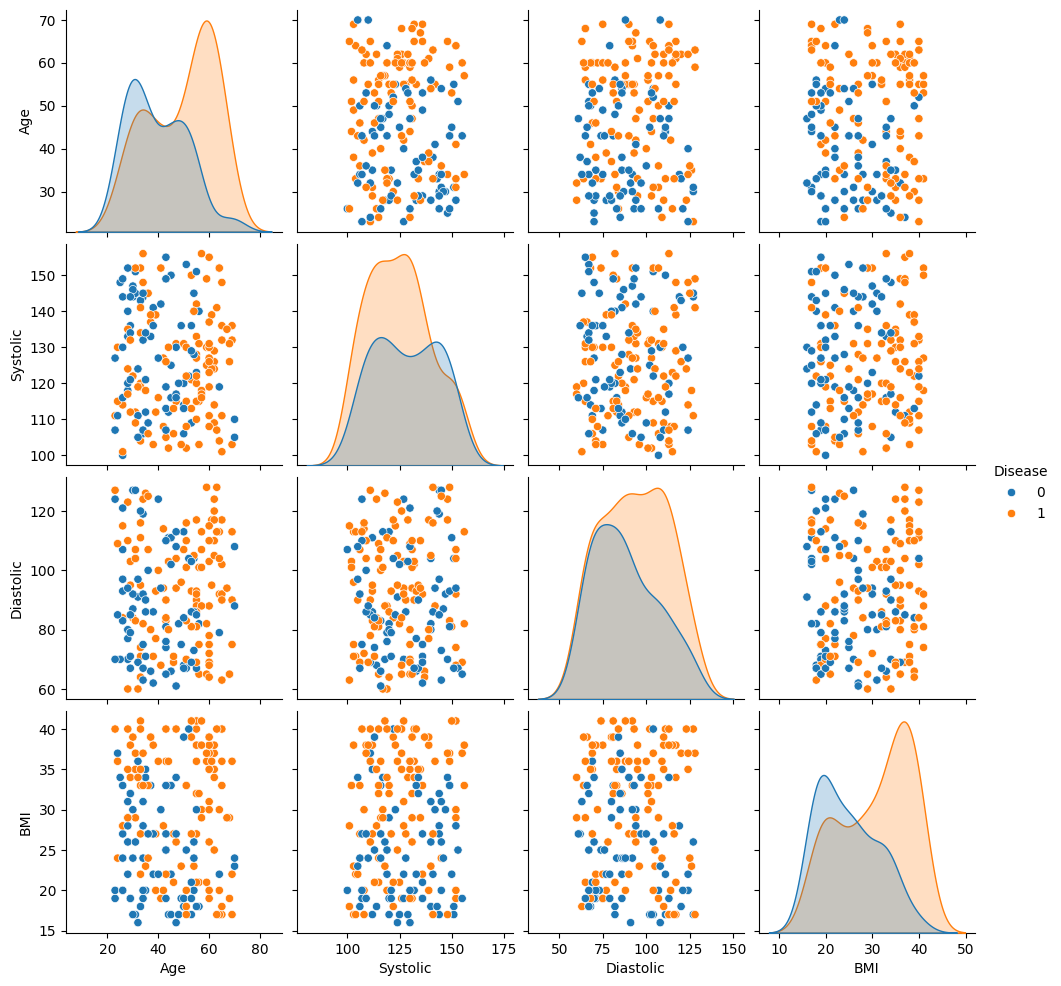

,Disease,Age,Systolic,Diastolic,BMI
Disease,1.000000,0.356533,-0.111110,0.142679,0.382232
Age,0.356533,1.000000,-0.047693,-0.001494,-0.005604
Systolic,-0.111110,-0.047693,1.000000,-0.008109,0.011938
Diastolic,0.142679,-0.001494,-0.008109,1.000000,0.003735
BMI,0.382232,-0.005604,0.011938,0.003735,1.000000


In [ ]:
#Hacemos otro prestamo interbibliotecario para llamar los archivos del Drive sin tener que subirlos.

from google.colab import drive
drive.mount('/content/drive')

nxl='/content/drive/MyDrive/Analítica de Negocios/Retos/3. BD2-HeartData_Int.xlsx'
XDB=pd.read_excel(nxl,sheet_name=0)
XDB=XDB.dropna()                        #Para evitar celdas vacías
XDB.head()                              #Para mostrar el archivo

#1. Seleccionamos las variables de nuestro interés:

XD=XDB[['Age','Systolic','Diastolic','BMI','Disease']]    #Son las variables que se tienen en cuenta.

#2. Determinar la correlación entre las variables y su impacto sobre la variable de salida:

plt.figure(figsize=(10,10))
sns.pairplot(XD, hue='Disease')
plt.show()

#3. La correlación numérica es:

XDB.corr()         #Nos arroja el coeficiente de correlación, que indica el grado de correlacion entre las variables.

2. Se procede con la implementación del modelo KNN.

La matriz de consfusión es:
: [[55 18]
 [29 78]]

La exactitud es: 0.7388888888888889
La sensibilidad es: 0.7289719626168224
La especificidad es: 0.7534246575342466

La predicción del paciente es: [0]


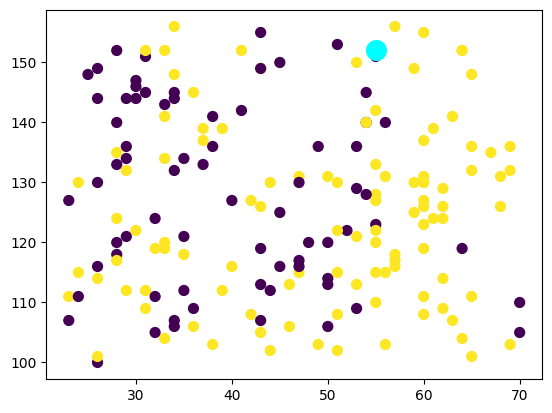

In [ ]:
#1. Construimos el modelo KNN:

XD=np.array(XDB[['Age','Systolic','Diastolic','BMI']])   #Variables de entrada.
yd=np.array(XDB['Disease'])                                      #Variable de salida / valor deseado.

knn=KNeighborsClassifier(n_neighbors=10)                        #Evaluame frente a 10 vecinos.
knn.fit(XD,yd)

ydp=knn.predict(XD)

#2. Evaluamos el modelo KNN:

cm=confusion_matrix(yd,ydp)
print('La matriz de consfusión es:\n:', cm)
VN=cm[0,0]; FP=cm[0,1];
VP=cm[1,1]; FN=cm[1,0]

#Calculamos exactitud, sensibilidad y especificidad:

Exactitud=(VP+VN)/(VP+VN+FP+FN)
Sensibilidad=VP/(VP+FN)
Especificidad=VN/(VN+FP)

print('\nLa exactitud es:', Exactitud)
print('La sensibilidad es:', Sensibilidad)
print('La especificidad es:', Especificidad)

#Del 100% de los datos que hay en el modelo, este es capaz de predecir aproximadamente el 73,9%, lo cual es bueno.

#3. Evaluamos un paciente:

XDp=np.array([[55,152,92,22]])
ydpp=knn.predict(XDp)
print('\nLa predicción del paciente es:', ydpp)

#4. ¿Dónde se encuentra el paciente dentro de los datos? Lo graficamos para ver donde queda:

plt.figure()
plt.scatter(XD[:,0],XD[:,1],c=yd, s=50,cmap='viridis')                 #Gráficar la correlación entre ingresos y egresos > correlación.
plt.scatter(XDp[:,0],XDp[:,1],marker='o', s=200,facecolors='aqua')   #"Del paciente graficar los ingresos (1) y egresos (2) en la misma gráfica". Esta es la gráfica del paciente.
plt.show()

**2. MODELO K-MEANS**

1. Se procede con la implementación del modelo.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Los centroides son los siguientes:
 [[ 46.70588235 139.14705882 112.35294118  27.32352941]
 [ 45.67567568 112.08108108 110.08108108  28.45945946]
 [ 38.51351351 143.24324324  78.21621622  29.        ]
 [ 58.475      121.7         79.575       29.05      ]
 [ 35.21875    114.875       77.125       27.90625   ]]


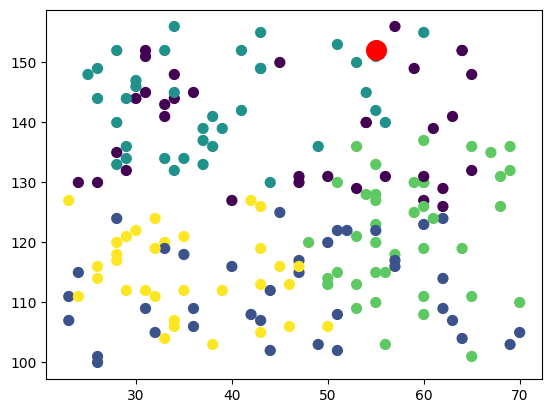


La predicción del paciente es: [2]

La predicción del paciente es: [1 3 0 0 0 2 0 3 2 0 4 0 2 4 0 4 4 2 3 2 0 4 4 2 2 0 2 2 2 3 2 1 3 2 0 3 3
 4 0 1 1 2 3 4 4 2 0 4 2 3 4 0 3 0 4 2 4 1 4 2 1 3 1 1 4 1 1 4 3 4 2 1 3 3
 4 3 0 3 1 0 4 2 4 3 3 3 1 3 3 2 0 1 1 2 3 0 4 3 2 0 1 1 0 4 1 0 3 0 3 2 0
 1 2 2 1 4 3 2 1 0 1 1 3 1 1 0 2 3 1 1 3 3 2 3 2 3 2 3 4 3 1 1 3 3 1 3 4 2
 3 2 2 1 3 0 4 2 1 0 4 1 0 0 1 0 4 1 0 0 4 2 0 2 0 4 1 4 1 4 3 2]
La matriz de consfusión es:
: [[11 11 25  9 17]
 [23 26 12 31 15]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]

La exactitud es: 0.5211267605633803
La sensibilidad es: 0.5306122448979592
La especificidad es: 0.5


In [ ]:
np.random.seed(42)     #Vamos a tomar las mismas semillas.

#1. Construimos la estructura del modelo:

k=5     #Número de clústeres o montoncitos de datos.
mkm=KMeans(n_clusters=k, init='random',random_state=42)
mkm.fit(XD,yd)

centroids=mkm.cluster_centers_
print('Los centroides son los siguientes:\n', centroids)

#2. Hacemos la gráfica:

plt.figure()
plt.scatter(XD[:,0],XD[:,1],c=mkm.labels_, s=50,cmap='viridis')    #Esta gráfica m epermite agrupar los datos por colores.
plt.scatter(XDp[:,0],XDp[:,1],marker='o', s=200,facecolors='red')   #Esta es la gráfica del paciente.
plt.show()

ydpkm=mkm.predict(XDp)
print('\nLa predicción del paciente es:', ydpkm)

ydpkm=mkm.predict(XD)
print('\nLa predicción del paciente es:', ydpkm)


#3. Evaluamos el modelo K-Means:

cm=confusion_matrix(yd,ydpkm)
print('La matriz de consfusión es:\n:', cm)
VN=cm[0,0]; FP=cm[0,1];
VP=cm[1,1]; FN=cm[1,0]

#Calculamos exactitud, sensibilidad y especificidad:

Exactitud=(VP+VN)/(VP+VN+FP+FN)
Sensibilidad=VP/(VP+FN)
Especificidad=VN/(VN+FP)

print('\nLa exactitud es:', Exactitud)
print('La sensibilidad es:', Sensibilidad)
print('La especificidad es:', Especificidad)



2. Se procede con la caracterización de cada clúster.

* Número de personas del clúster.
* Número de personas con enfermedad cardiaca por clúster.
* Número de personas saludables por clúster.

In [ ]:
labels=mkm.labels_
print('Los labels son:\n',labels)    #Esto indica el lugar en el que cayó cada persona.

counts_1=np.bincount(labels)
print('\nLos conteos son:\n',counts_1)

c01=len(np.where((labels==0) & (yd==1))[0])        #Para que me diga cuántos son los enfermos del clúster 0.
c00=len(np.where((labels==0) & (yd==0))[0])        #Para que me diga cuántos son los saludables del clúster 0.
print('\nEl número de personas con enfermedad cardiaca en el clúster 0 es:',c01)
print('\nEl porcentaje de personas con enfermedad cardiaca en el clúster 0 es:', c01/(c00+c01))
print('\nEl número de personas saludables en el clúster 0 es:',c00)
print('\nEl porcentaje de personas saludables en el clúster 0 es:', c00/(c00+c01))


c11=len(np.where((labels==1) & (yd==1))[0])        #Para que me diga cuántos son los enfermos del clúster 1.
c10=len(np.where((labels==1) & (yd==0))[0])        #Para que me diga cuántos son los saludables del clúster 1.
print('\nEl número de personas con enfermedad cardiaca en el clúster 1 es:',c11)
print('\nEl porcentaje de personas con enfermedad cardiaca en el clúster 1 es:', c11/(c10+c11))
print('\nEl número de personas saludables en el clúster 1 es:',c10)
print('\nEl porcentaje de personas saludables en el clúster 1 es:', c10/(c10+c11))

c21=len(np.where((labels==2) & (yd==1))[0])        #Para que me diga cuántos son los enfermos del clúster 2.
c20=len(np.where((labels==2) & (yd==0))[0])        #Para que me diga cuántos son los saludables del clúster 2.
print('\nEl número de personas con enfermedad cardiaca en el clúster 2 es:',c21)
print('\nEl porcentaje de personas con enfermedad cardiaca en el clúster 2 es:', c21/(c21+c20))
print('\nEl número de personas saludables en el clúster 2 es:',c20)
print('\nEl porcentaje de personas saludables en el clúster 2 es:', c20/(c20+c21))

c31=len(np.where((labels==3) & (yd==1))[0])        #Para que me diga cuántos son los enfermos del clúster 3.
c30=len(np.where((labels==3) & (yd==0))[0])        #Para que me diga cuántos son los saludables del clúster 3.
print('\nEl número de personas con enfermedad cardiaca en el clúster 3 es:',c31)
print('\nEl porcentaje de personas con enfermedad cardiaca en el clúster 3 es:', c31/(c31+c30))
print('\nEl número de personas saludables en el clúster 3 es:',c30)
print('\nEl porcentaje de personas saludables en el clúster 3 es:', c30/(c30+c31))

c41=len(np.where((labels==4) & (yd==1))[0])        #Para que me diga cuántos son los enfermos del clúster 4.
c40=len(np.where((labels==4) & (yd==0))[0])        #Para que me diga cuántos son los saludables del clúster 4.
print('\nEl número de personas con enfermedad cardiaca en el clúster 4 es:',c41)
print('\nEl porcentaje de personas con enfermedad cardiaca en el clúster 4 es:', c41/(c41+c40))
print('\nEl número de personas saludables en el clúster 4 es:',c40)
print('\nEl porcentaje de personas saludables en el clúster 4 es:', c40/(c40+c41))

Los labels son:
 [1 3 0 0 0 2 0 3 2 0 4 0 2 4 0 4 4 2 3 2 0 4 4 2 2 0 2 2 2 3 2 1 3 2 0 3 3
 4 0 1 1 2 3 4 4 2 0 4 2 3 4 0 3 0 4 2 4 1 4 2 1 3 1 1 4 1 1 4 3 4 2 1 3 3
 4 3 0 3 1 0 4 2 4 3 3 3 1 3 3 2 0 1 1 2 3 0 4 3 2 0 1 1 0 4 1 0 3 0 3 2 0
 1 2 2 1 4 3 2 1 0 1 1 3 1 1 0 2 3 1 1 3 3 2 3 2 3 2 3 4 3 1 1 3 3 1 3 4 2
 3 2 2 1 3 0 4 2 1 0 4 1 0 0 1 0 4 1 0 0 4 2 0 2 0 4 1 4 1 4 3 2]

Los conteos son:
 [34 37 37 40 32]

El número de personas con enfermedad cardiaca en el clúster 0 es: 23

El porcentaje de personas con enfermedad cardiaca en el clúster 0 es: 0.6764705882352942

El número de personas saludables en el clúster 0 es: 11

El porcentaje de personas saludables en el clúster 0 es: 0.3235294117647059

El número de personas con enfermedad cardiaca en el clúster 1 es: 26

El porcentaje de personas con enfermedad cardiaca en el clúster 1 es: 0.7027027027027027

El número de personas saludables en el clúster 1 es: 11

El porcentaje de personas saludables en el clúster 1 es: 0.2972972972

**ANÁLISIS DE RESULTADOS:**

En este caso de análisis, la base de datos presentan 180 personas a evaluar en base a 5 variables consideradas, las cuales son:

* Age, que representa la edad de las personas a evaluar.
* Systolic, que representa la presión sistólica de las personas evaluadas.
* Diastolic, que es la presión diastólica de las personas evaluadas.
* BMI, que es el índice de masa corporal de las personas evaluadas.
* Disease, que es la variable del resultado final y arroja el resultado de si es probable o no que esta persona desarrolle una enfermedad cardíaca.

Luego de analizar que tan bien realiza el proceso de caracterización cada una de estas variables, se determinó que la variable que mejor lleva a cabo este proceso para una enfermedad cardiaca en las personas analizadas es el BMI (Índice de Masa Corporal), pues su correlación es del 0.382232, es decir, 38.22%. Por otro lado, al considerar las variables tanto de entrada como de salida, se determinó que las dos que tienen más correlación entre si son "Índice de Masa Corporal (BMI)" y "Disease" pues su correlación es de	0.382232, es decir, 38,22% aproximadamente. Ahora bien, si no tomamos la variable de salida "Disease", las dos variables con mayor correlación serían "Age" y "Systolic" con una correlación de -0.047693, es decir, -4,8% aproximadamente.


En cuanto al comportamiento del modelo KNN en el pronóstico de los datos utilizados para la configuración del modelo, encontramos los siguientes resultados: su exactitud es de 74,9% aproximadamente, lo cual representa que del 100% de los datos este es capaz de predecir correctamente el 74,9% del total; su sensibilidad es de 72,9% aproximadamente, lo cual representa el comportamiento del modelo frente a la clasificación de posibles personas que desarrollarán una enfermedad cardiaca; y, finalmente, su especificidad es de aproximadamente 75,3%, lo cual nos dice cómo se comporta el modelo frente a la clasificación de posibles personas sanas.


Ahora, refiriendonos al comportamiento del modelo K-Means frente al pronóstico de los datos utilizados para la configuración del modelo, econtramos que: su exactitud es 52,11% aproximadamente, lo cual representa la cantidad de datos del total que el modelo es capaz de predecir correctamente (es un resultado de poca confiabilidad); su sensibilidad es de 53,06% aproximadamente, lo cual representa el comportamiento del modelo frente a la clasificación de posibles personas que desarrollarán una enfermedad cardiaca; y, finalmente, su especificidad es de aproximadamente 50%, lo cual nos dice cómo se comporta el modelo frente a la clasificación de posibles personas sanas. Esto nos demuestra que el modelo K-Means no es tan util para evaluar ninguno de los casos, pues es aproximadamente la mitad de los casos que saca correctos; sin embargo, es ligeramente mejor en la clasificación de posibles personas que desarrollarán una enfermedad cardiaca.


Si nos enfocamos en un caso en especifico, al analizar la probabilidad de que una persona con las características ["Age","Systolic","Diastolic","BMI",'Disease']= [(55,152,92,22)] desarrolle una enfermedad cardiaca, encontramos con KNN que no es probable. Además, al usar el modelo K-Means y clasificar el paciente en el clúster número 2, encontramos que aplica el patron de que de un total de 37 personas evaluadas el 70,27% tiene posibilidad de desarrollar una enfermedad cardiaca y 29,73% de estar saludable.


En cuanto al número de individuos que desarrollarán una enfermedad cardiaca de acuerdo con la estructura de cada uno de los clusters, se encuentra que:

* En el clúster 0, de un total de 34 personas 23 personas son probables a desarrollar una enfermedad cardiaca (67,65%) mientras que 11 son probables a estar saludables en este sentido (32,35%).

* En el clúster 1, de un total de 37 personas 26 son probables a desarrollar una enfermedad cardiaca (70,27%) mientras que 11 son probables a estar saludables (29,73%).

* En el clúster 2, de un total de 37 personas 12 son probables a desarrollar una enfermedad cardiaca (32,43%) mientras que 25 son probables a estar saludables (67,57%).

* En el clúster 3, de un total de 40 personas 31 son probables a desarrollar una enfermedad cardiaca (77,5%) mientras que 9 son probables a estar saludables (22,5%).

* En el clúster 4, de un total de 32 personas 15 son probables a desarrollar una enfermedad cardiaca (46,875%) mientras que 17 son probables a estar saludables (53,125%).


Además, se hace importante analizar cual es el cluster que presenta la mayor edad, la mayor presión sistólica, la menor presión diastólica, y el menor índice de masa corporal. Los resultados arrojados en K-Means, fueron:

*   Clúster con mayor edad: 3 con un promedio de 58,475.
*   Clúster con mayor presión sistólica: 2 con un promedio de 143,243.
*   Clúster con menor presión diastólica: 4 con un promedio de 77,125.
*   Clúster con menor índice de masa corporal: 0 con un promedio de 27,323.